[Reference](https://python.plainenglish.io/15-data-science-snippets-to-optimize-your-coding-pipeline-93a5625d48cd)

# 1. Loading multiple files with glob and list comprehension



In [1]:
import glob
import pandas as pd
csv_files = glob.glob("path/to/folder/with/csvs/*.csv")
dfs = [pd.read_csv(filename) for filename in csv_files]

# 2. Getting unique values from a column table

In [2]:
import pandas as pd
df = pd.read_csv("path/to/csv/file.csv")
df["Item_Identifier"].unique()array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

# 3. Display pandas dataframes side by side

In [3]:
from IPython.display import display_html
from itertools import chain,cycledef display_side_by_side(*args,titles=cycle([''])):
    # source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+="<br>"
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
df1 = pd.read_csv("file.csv")
df2 = pd.read_csv("file2")
display_side_by_side(df1.head(),df2.head(), titles=['Sales','Advertising'])
### Output

# 4. Remove all NaNs in pandas dataframe

In [7]:
import pandas as pd
df = pd.DataFrame(dict(a=[1,2,3,None]))
df
df.dropna(inplace=True)
df

,a
0,1.0
1,2.0
2,3.0


# 5. Show number of NaN entries in DataFrame columns

In [8]:
def findNaNCols(df):
    for col in df:
        print(f"Column: {col}")
        num_NaNs = df[col].isnull().sum()
        print(f"Number of NaNs: {num_NaNs}")
df = pd.DataFrame(dict(a=[1,2,3,None],b=[None,None,5,6]))
findNaNCols(df)

Column: a
Number of NaNs: 1
Column: b
Number of NaNs: 2


# 6. Transforming columns with .apply and lambda functions

In [9]:
df = pd.DataFrame(dict(a=[10,20,30,40,50]))
square = lambda x: x**2
df["a"]=df["a"].apply(square)
df

,a
0,100
1,400
2,900
3,1600
4,2500


# 7. Transforming 2 DataFrame columns into a dictionary

In [10]:
df = pd.DataFrame(dict(a=["a","b","c"],b=[1,2,3]))
df_dictionary = dict(zip(df["a"],df["b"]))
df_dictionary

{'a': 1, 'b': 2, 'c': 3}

# 8. Plotting grid of distributions with conditionals on columns

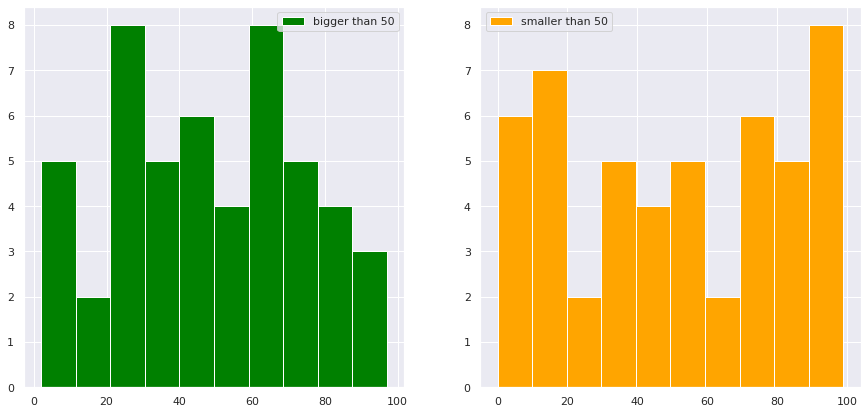

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

df = pd.DataFrame(dict(a=np.random.randint(0,100,100),b=np.arange(0,100,1)))
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df["b"][df["a"]>50].hist(color="green",label="bigger than 50")
plt.legend()
plt.subplot(1,2,2)
df["b"][df["a"]<50].hist(color="orange",label="smaller than 50")
plt.legend()
plt.show()

# 9. Running t-tests for values of different columns in pandas

In [13]:
from scipy.stats import ttest_rel

data = np.arange(0,1000,1)
data_plus_noise = np.arange(0,1000,1) + np.random.normal(0,1,1000)
df = pd.DataFrame(dict(data=data, data_plus_noise=data_plus_noise))
print(ttest_rel(df["data"],df["data_plus_noise"]))

Ttest_relResult(statistic=0.7425669803805108, pvalue=0.4579184491694954)


# 10. Merging dataframes on a given column

In [14]:
df1 = pd.DataFrame(dict(a=[1,2,3],b=[10,20,30],col_to_merge=["a","b","c"]))
df2 = pd.DataFrame(dict(d=[10,20,100],col_to_merge=["a","b","c"]))
df_merged = df1.merge(df2, on='col_to_merge')
df_merged

,a,b,col_to_merge,d
0,1,10,a,10
1,2,20,b,20
2,3,30,c,100


# 11. Normalizing values in a pandas column with sklearn

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scores = scaler.fit_transform(df["a"].values.reshape(-1,1))

# 12. Dropping NaNs in a specific column in pandas

In [17]:
df.dropna(subset=["col_to_remove_NaNs_from"],inplace=True)

# 13. Selecting subset of a dataframe with conditionals and or statement

In [18]:
df = pd.DataFrame(dict(result=["Pass","Fail","Pass","Fail","Distinction","Distinction"]))
pass_index = (df["result"]=="Pass") | (df["result"]=="Distinction")
df_pass = df[pass_index]
df_pass

# 14. Basic pie chart

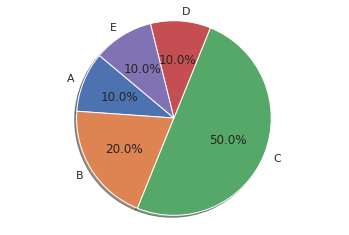

In [19]:
import matplotlib.pyplot as plt

df = pd.DataFrame(dict(a=[10,20,50,10,10],b=["A","B","C","D","E"]))
labels = df["b"]
sizes = df["a"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# 15. Changing a percentage string to a numerical value using .apply()

In [20]:
def change_to_numerical(x):
    try:
        x = int(x.strip("%")[:2])
    except:
        x = int(x.strip("%")[:1])
    return x

df = pd.DataFrame(dict(a=["A","B","C"],col_with_percentage=["10%","70%","20%"]))
df["col_with_percentage"] = df["col_with_percentage"].apply(change_to_numerical)
df

,a,col_with_percentage
0,A,10
1,B,70
2,C,20
